In [19]:
import matplotlib.pyplot as plt
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd

In [18]:
!pip install Ipython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
debussy_file = "/content/8- Implementing the amplitude envelope_audio_debussy.wav"

In [8]:
duke_file = "/content/8- Implementing the amplitude envelope_audio_duke.wav"

In [9]:
redhot_file = "/content/8- Implementing the amplitude envelope_audio_redhot.wav"

In [10]:
debussy, _ = librosa.load(debussy_file)
redhot,_ = librosa.load(redhot_file)
duke,_ = librosa.load(duke_file)

In [11]:
FRAME_LENGTH = 1024
HOP_LENGTH = 512

In [13]:
rms_redhot = librosa.feature.rms(redhot, frame_length=FRAME_LENGTH,hop_length=HOP_LENGTH)[0]
rms_duke = librosa.feature.rms(duke,frame_length=FRAME_LENGTH,hop_length=HOP_LENGTH)[0]
rms_debussy = librosa.feature.rms(debussy,frame_length=FRAME_LENGTH,hop_length=HOP_LENGTH)[0]

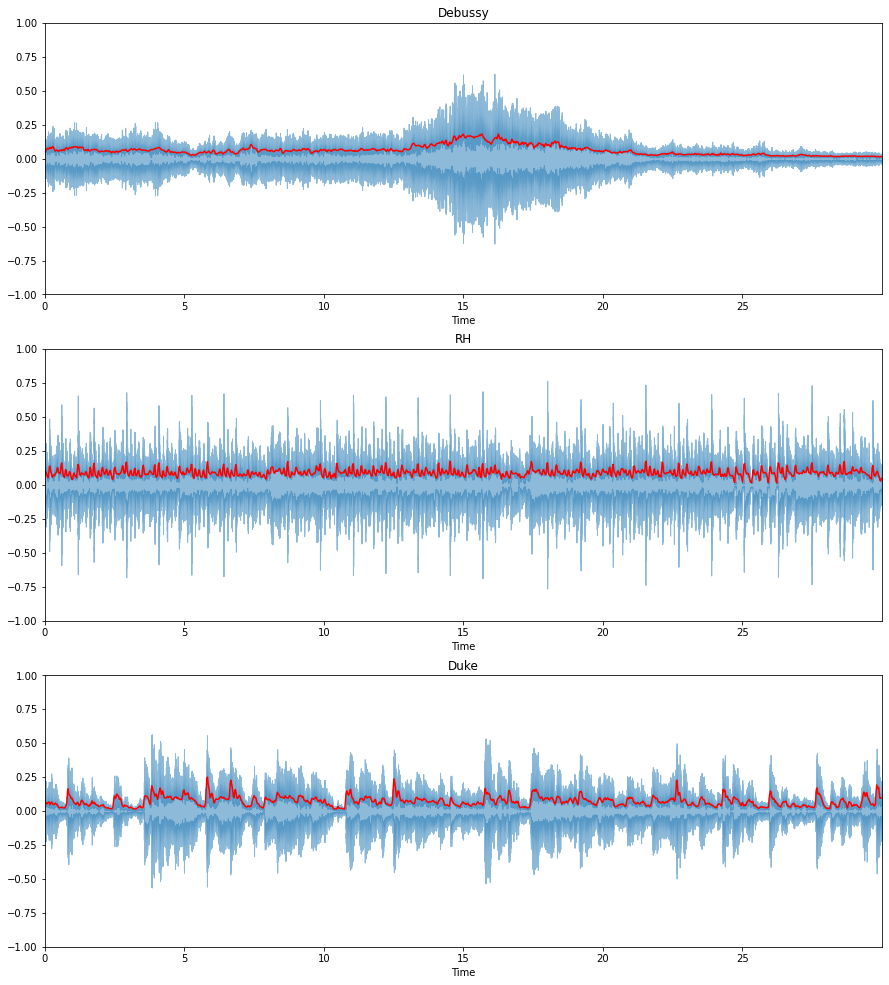

In [20]:
frames = range(len(rms_debussy))
t = librosa.frames_to_time(frames,hop_length=HOP_LENGTH)

plt.figure(figsize=(15,17))

plt.subplot(3,1,1)
librosa.display.waveplot(debussy,alpha=0.5)
plt.plot(t,rms_debussy, color='r')
plt.title("Debussy")
plt.ylim((-1,1))

plt.subplot(3,1,2)
librosa.display.waveplot(redhot,alpha=0.5)
plt.plot(t,rms_redhot, color='r')
plt.title("RH")
plt.ylim((-1,1))

plt.subplot(3,1,3)
librosa.display.waveplot(duke,alpha=0.5)
plt.plot(t,rms_duke, color='r')
plt.title("Duke")
plt.ylim((-1,1))

plt.show()

# RMS from scratch

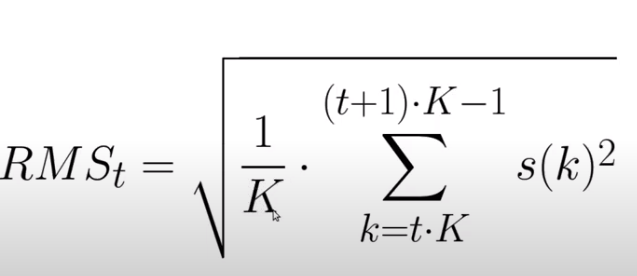

In [22]:
def rms(signal,frame_length,hop_length):
  rms = []
  for i in range(0,len(signal),hop_length):
      rms_current_frame = np.sqrt(np.sum(signal[i:i+frame_length]**2)/ frame_length)
      rms.append(rms_current_frame)
  return np.array(rms)

In [23]:
rms_redhot_1 = rms(redhot, frame_length=FRAME_LENGTH,hop_length=HOP_LENGTH)
                                                                            
rms_duke_1 = rms(duke,frame_length=FRAME_LENGTH,hop_length=HOP_LENGTH)
rms_debussy_1 = rms(debussy,frame_length=FRAME_LENGTH,hop_length=HOP_LENGTH)

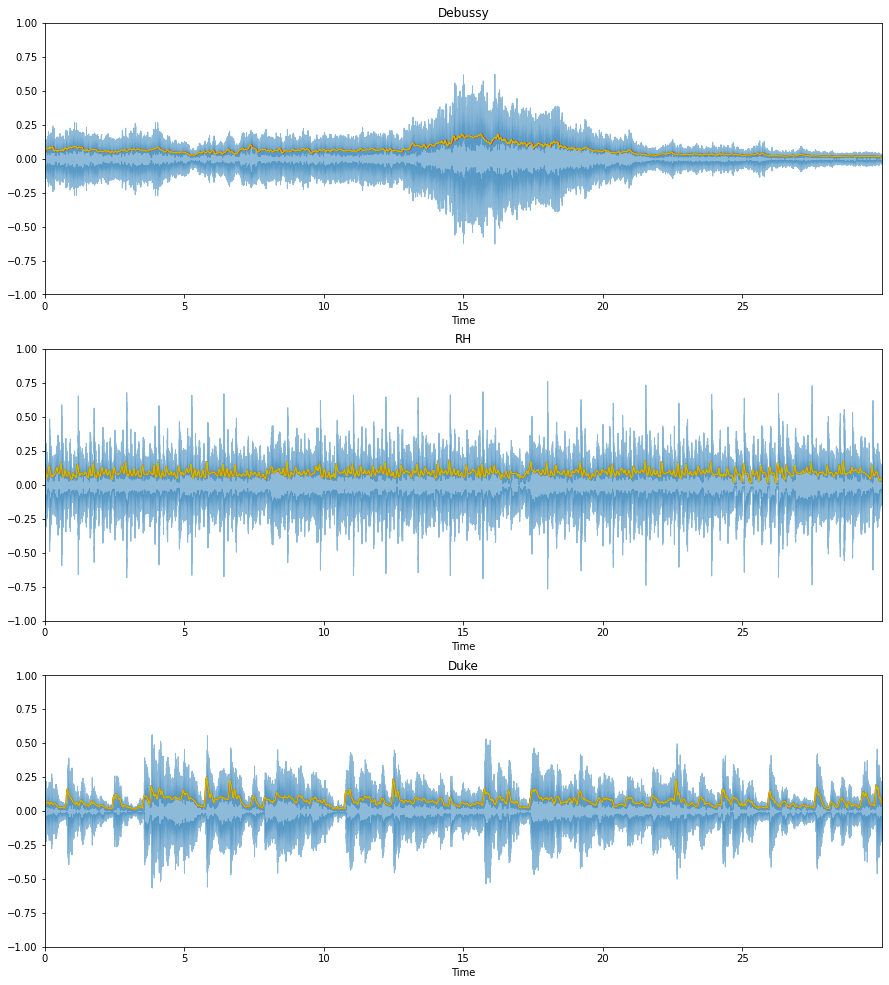

In [24]:
plt.figure(figsize=(15,17))

plt.subplot(3,1,1)
librosa.display.waveplot(debussy,alpha=0.5)
plt.plot(t,rms_debussy, color='r')
plt.plot(t,rms_debussy_1, color='y')
plt.title("Debussy")
plt.ylim((-1,1))

plt.subplot(3,1,2)
librosa.display.waveplot(redhot,alpha=0.5)
plt.plot(t,rms_redhot_1, color='r')
plt.plot(t,rms_redhot_1, color='y')
plt.title("RH")
plt.ylim((-1,1))

plt.subplot(3,1,3)
librosa.display.waveplot(duke,alpha=0.5)
plt.plot(t,rms_duke_1, color='r')
plt.plot(t,rms_duke_1, color='y')
plt.title("Duke")
plt.ylim((-1,1))

plt.show()

# Zero Crossing Rate

In [25]:
zcr_debussy = librosa.feature.zero_crossing_rate(debussy, frame_length=FRAME_LENGTH,hop_length=HOP_LENGTH)[0]
zcr_redhot = librosa.feature.zero_crossing_rate(redhot,frame_length=FRAME_LENGTH,hop_length=HOP_LENGTH)[0]
zcr_duke = librosa.feature.zero_crossing_rate(duke, frame_length=FRAME_LENGTH,hop_length=HOP_LENGTH)[0]

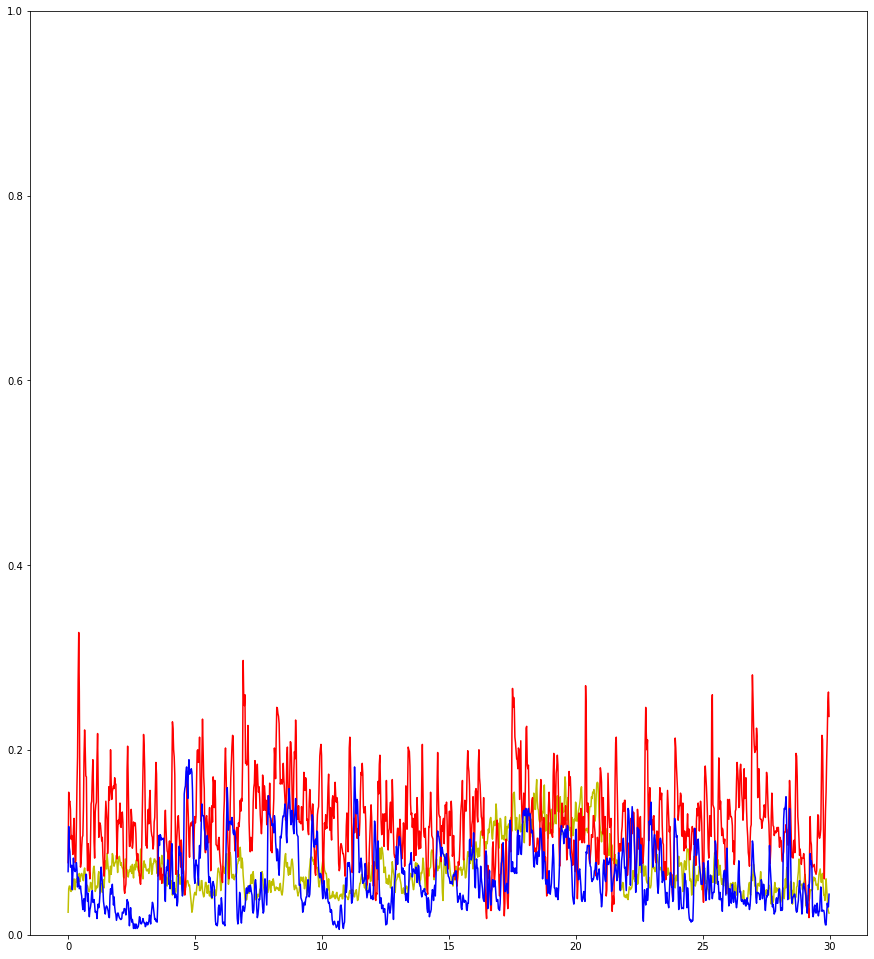

In [30]:
plt.figure(figsize=(15,17))

plt.plot(t,zcr_debussy, color='y')
plt.plot(t,zcr_redhot,color='r')
plt.plot(t,zcr_duke,color='b')
plt.ylim((0, 1))
plt.show()

RHCP presents highest zero crossing range, because using a lot of like percussive instruments and usually rock music has a zcr that's kind of like higher than classical music